# 2.4 분류 예측의 불확실성 추정

- 불확실성 추정
    - 분류모델이 예측한 분류 클래스가 얼마나 정확한 지 판단 필요
    - 예를 들어, 암진단 응용에서 거짓 양성(False Positive) 분류는 환자에게 추가 진료를 요구하겠지만, 거짓 음성(False Negative) 분류는 심각한 질병을 치료하지 못하게 할 수 있음. 
- scikit-learn에서 제공하는 불확실성 추정 함수
    - decision_function
    - predict_prob

In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os


from preamble import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [4]:
print("X_test.shape: {}".format(X_test.shape))

print()

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

print()

print("Decision function:\n{}".format(gbrt.decision_function(X_test)))

X_test.shape: (25, 2)

Decision function shape: (25,)

Decision function:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662 -7.691  4.11   1.108  3.408
 -6.463  4.29   3.902 -1.2    3.662 -4.172 -1.23  -3.916  4.036  4.11
  4.11   0.657  2.698 -2.657 -1.868]


In [7]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


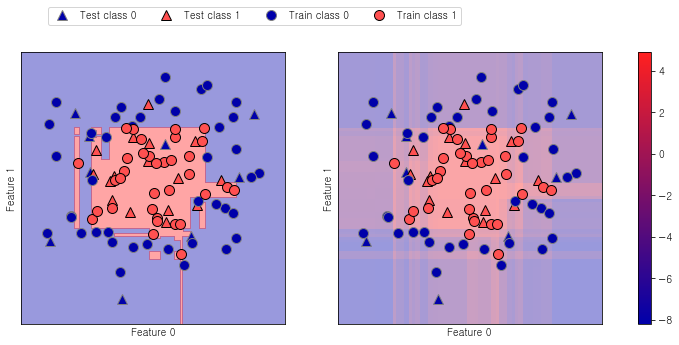

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

- 왼쪽 그래프: 결정 경계
- 오른쪽 그래프: decision_function의 값을 색으로 표현

# 2.4.1 예측 확률

- predict_proba
    - 각 분류 클래스에 대한 확률값 반환
    - 반환값의 shape는 항상 (n_samples, 2)
        - 각 샘플당 첫번째 원소는 첫번째 클래스의 예측 확률, 두번째 원소는 두번째 클래스의 예측 확률
        - 두 원소 값의 합은 항상 1.0
    - overfitting 된 복잡도가 높은 모델에서는 각 클래스에 대한 예측 확실성이 높음 (즉, 예측 확신이 강함)
    - 일반적으로 복잡도가 낮은 모델은 예측에 대한 불확실성이 높음 (즉, 예측 확신이 약함)
- 불확실의 정도와 모델의 정확도가 동일 --> 보정(Calibration)이 잘 되었다고 판단
    - 보정이 잘 된 모델에서 70% 확신을 지닌 예측은 70%의 정확도를 냄

In [9]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

print()

# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)))

Shape of probabilities: (25, 2)

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]
 [1.    0.   ]
 [0.016 0.984]
 [0.248 0.752]
 [0.032 0.968]
 [0.998 0.002]
 [0.014 0.986]
 [0.02  0.98 ]
 [0.769 0.231]
 [0.025 0.975]
 [0.985 0.015]
 [0.774 0.226]
 [0.98  0.02 ]
 [0.017 0.983]
 [0.016 0.984]
 [0.016 0.984]
 [0.341 0.659]
 [0.063 0.937]
 [0.934 0.066]
 [0.866 0.134]]


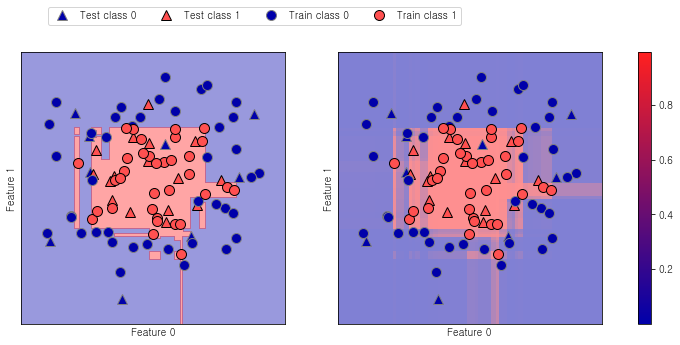

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

- 많은 모델에 대한 불확실성 추정 도표 : http://bit.ly/2cqCYx6

# 다중 분류에서의 불확실성

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [12]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


In [13]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [14]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.107 0.784 0.109]
 [0.789 0.106 0.105]
 [0.102 0.108 0.789]
 [0.107 0.784 0.109]
 [0.108 0.663 0.228]
 [0.789 0.106 0.105]]
Sums: [1. 1. 1. 1. 1. 1.]


In [15]:
print("Argmax of predicted probabilities:\n{}".format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))

print()

print("predictions: {}".format(logreg.predict(X_test)[:10]))

print()

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))

print()

print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']

predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']

argmax of decision function: [1 0 2 1 1 0 1 2 1 1]

argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
